In [10]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
import os
from sklearn.neighbors import NearestNeighbors

In [37]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (196, 196)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [38]:
def extract(file):
    file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
    #display(file)

    file = np.stack((file,)*3, axis=-1)

    file = np.array(file)/255.0

    embedding = model.predict(file[np.newaxis, ...])
    #print(embedding)
    vgg16_feature_np = np.array(embedding)
    flattended_feature = vgg16_feature_np.flatten()

    return flattended_feature

In [53]:
carpeta_imagenes = "C:\\Users\\diego\\DataspellProjects\\EDA-Amazon-Productos\\testeogatos"

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Listas para almacenar las características extraídas y los nombres de archivo
caracteristicas_extraidas = []
nombres_de_archivo = []

# Iterar sobre cada archivo en la carpeta
for archivo in archivos_en_carpeta:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Extraer características y agregarlas a la lista
        caracteristicas = extract(ruta_completa)
        caracteristicas_extraidas.append(caracteristicas)

        # Agregar el nombre de archivo a la lista
        nombres_de_archivo.append(archivo)

# Convertir las listas a arrays de NumPy
caracteristicas_extraidas = np.array(caracteristicas_extraidas)
nombres_de_archivo = np.array(nombres_de_archivo)

1/1 [==============================] - 0s 64ms/step


In [57]:
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')  # Puedes ajustar n_neighbors según tus necesidades

# Ajustar el modelo con las características extraídas
knn_model.fit(caracteristicas_extraidas)

NearestNeighbors(metric='cosine')

In [58]:
import matplotlib.pyplot as plt
from PIL import Image
def buscar_imagen_similar(imagen_query, knn_model, caracteristicas_extraidas, archivos_en_carpeta, carpeta_imagenes):
    # Extraer características de la imagen de consulta
    caracteristicas_query = extract(imagen_query)

    # Realizar la búsqueda de vecinos más cercanos
    _, indices_vecinos = knn_model.kneighbors(caracteristicas_query.reshape(1, -1))

    # Imprimir los nombres de los archivos de las imágenes más similares y mostrar las imágenes
    print("Imágenes más similares a", imagen_query, ":")
    for indice in indices_vecinos[0]:
        nombre_archivo = archivos_en_carpeta[indice]
        print(nombre_archivo)

        # Mostrar la imagen
        ruta_imagen = os.path.join(carpeta_imagenes, nombre_archivo)
        imagen = Image.open(ruta_imagen)
        plt.imshow(imagen)
        plt.title(nombre_archivo)
        plt.show()

1/1 [==============================] - 0s 415ms/step
Imágenes más similares a C:\Users\diego\DataspellProjects\EDA-Amazon-Productos\testeogatos\Hisotoria-de-los-gatos.jpg :
gettyimages-175925832_1615921990607.jpeg


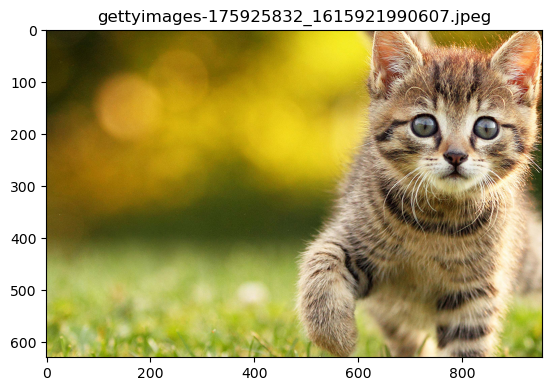

alimento-para-gato.png


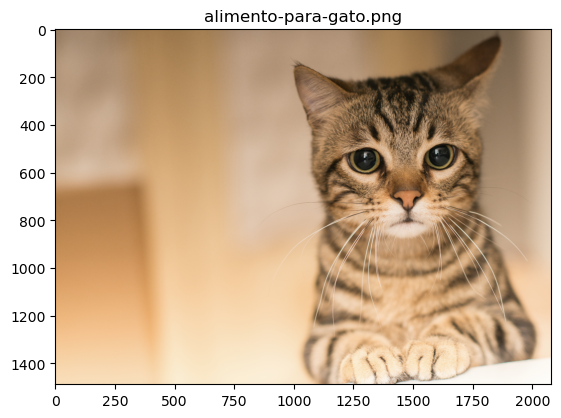

gato.jpg


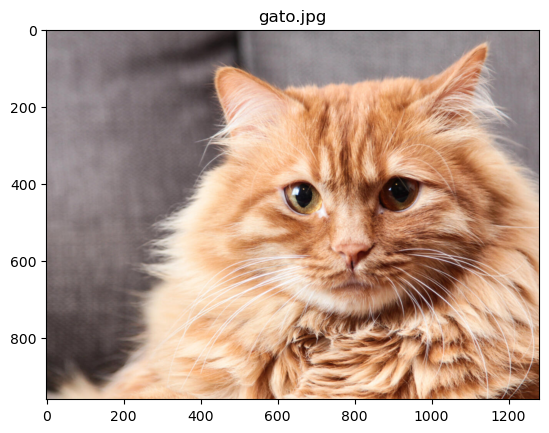

Personalidad-gatos.png


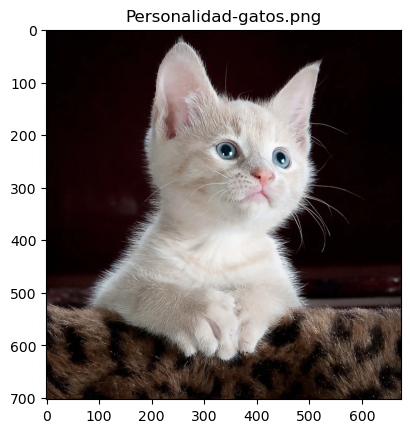

Getting-A-Cat1080x608.jpg


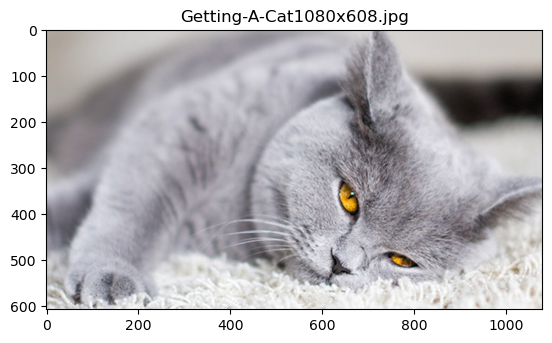

In [59]:
imagen_query = "C:\\Users\\diego\\DataspellProjects\\EDA-Amazon-Productos\\testeogatos\\Hisotoria-de-los-gatos.jpg"
buscar_imagen_similar(imagen_query, knn_model, caracteristicas_extraidas, archivos_en_carpeta, carpeta_imagenes)

In [33]:
from PIL import Image
import os

# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = 'C:\\Users\\diego\\DataspellProjects\\EDA-Amazon-Productos\\carpeta2'

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

# Iterar sobre los archivos y obtener las dimensiones de las imágenes
for archivo in archivos:
    # Comprobar si el archivo es una imagen (puedes ajustar las extensiones según tus necesidades)
    if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(carpeta_imagenes, archivo)

        # Abrir la imagen con Pillow
        with Image.open(ruta_completa) as img:
            # Obtener las dimensiones de la imagen
            dimensiones = img.size
            print(f"Dimensiones de {archivo}: {dimensiones}")

Dimensiones de 017nnIqlBtL._AC_UL320_.jpg: (320, 160)
Dimensiones de 01EOL+0ZACL._AC_UL320_.jpg: (320, 160)
Dimensiones de 01ppRspuW1L._AC_UL320_.jpg: (138, 320)
Dimensiones de 01RmK+J4pJL._AC_UL320_.gif: (320, 213)
Dimensiones de 01RmK+J4pJL._AC_UY218_.gif: (327, 218)
Dimensiones de 01w1gJp0KzL._AC_UL320_.jpg: (320, 267)
Dimensiones de 11ADXAVLTUL._AC_UL320_.jpg: (320, 111)
Dimensiones de 11DCC21h4cL._AC_UL320_.jpg: (320, 225)
Dimensiones de 11EBbwN7LdS._AC_UL320_.jpg: (320, 310)
Dimensiones de 11F8KGtgGEL._AC_UL320_.jpg: (126, 320)
Dimensiones de 11ImyxA-dXL._AC_UL320_.jpg: (320, 248)
Dimensiones de 11KJEABGYAL._AC_UL320_.jpg: (320, 134)
Dimensiones de 11MXuNzs-ML._AC_UL320_.jpg: (165, 320)
Dimensiones de 11n1BF6Hh3L._AC_UL320_.jpg: (232, 320)
Dimensiones de 11P7m3cjjmL._AC_UL320_.jpg: (320, 161)
Dimensiones de 11qWRzJVLTL._AC_UL320_.jpg: (320, 250)
Dimensiones de 11rXTMlDjPL._AC_UL320_.jpg: (320, 265)
Dimensiones de 11SJ+tk7UuL._AC_UL320_.jpg: (320, 58)
Dimensiones de 11SV2O+QzYL._A